In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import os

In [2]:
def load_data(train_size, test_size):
        trainset = datasets.MNIST('data', train = True, download = False, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
        train_data = torch.utils.data.DataLoader(trainset, batch_size=train_size, shuffle=True)
        testset = datasets.MNIST('data', train = False, download = False, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
        test_data =  torch.utils.data.DataLoader(testset, batch_size=test_size, shuffle=True)
        return (train_data, test_data)

In [3]:
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 5)
        self.linear2 = nn.Linear(5, 9)
        self.linear3 = nn.Linear(9, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 25)
        self.linear2 = nn.Linear(25, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 45)
        self.linear2 = nn.Linear(45, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 65)
        self.linear2 = nn.Linear(65, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 85)
        self.linear2 = nn.Linear(85, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 105)
        self.linear2 = nn.Linear(105, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

class Model7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 125)
        self.linear2 = nn.Linear(125, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 145)
        self.linear2 = nn.Linear(145, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 165)
        self.linear2 = nn.Linear(165, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 185)
        self.linear2 = nn.Linear(185, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
def train(model, optimizer, data):
    model.train()
    for batch_id, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data.view(-1, 784))
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [5]:
epoch=8
parameters = []
train_loss_lst = []
test_loss_lst = []
train_accuracy_lst = []
test_accuracy_lst = []
def train_models(model, optimizer, train_data, test_data):
    print('Training model ')
    for epochs in range(1, epoch + 1):
        train(model, optimizer, train_data)
    loss_train, acc_train = calc_diff(model, train_data)
    loss_test, acc_test = calc_diff(model, test_data)
    train_loss_lst.append(loss_train)
    test_loss_lst.append(loss_test)
    train_accuracy_lst.append(acc_train)
    test_accuracy_lst.append(acc_test)
    total_parameters = sum(p.numel() for p in model.parameters())
    parameters.append(total_parameters)
    print("Total parameters", total_parameters)
    print('Training completed - ' , loss_train)
    print('test loss - ', loss_test)
    return loss_train, loss_test

In [6]:
def calc_diff(model, loader):
    count = 0
    total = 0
    total_cost = 0
    counter = 0
    loss_funct = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_funct(output, target)
            total_cost += cost
            counter += 1
            for i, op in enumerate(output):
                if torch.argmax(op) == target[i]:
                    count += 1
                total += 1
    return total_cost / counter, round(count/total, 3)

In [7]:
train_batch = 50
test_batch = 100
train_data, test_data = load_data(train_batch, test_batch)

In [8]:
model=Model1()
print("Model 1")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 1
Training model 
Total parameters 4079
Training completed -  tensor(0.3235)
test loss -  tensor(0.3342)


(tensor(0.3235), tensor(0.3342))

In [9]:
model=Model2()
print("Model 2")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 2
Training model 
Total parameters 19923
Training completed -  tensor(0.1059)
test loss -  tensor(0.1472)


(tensor(0.1059), tensor(0.1472))

In [10]:
model=Model3()
print("Model 3")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 3
Training model 
Total parameters 35783
Training completed -  tensor(0.0696)
test loss -  tensor(0.1285)


(tensor(0.0696), tensor(0.1285))

In [11]:
model=Model4()
print("Model 4")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 4
Training model 
Total parameters 51643
Training completed -  tensor(0.0460)
test loss -  tensor(0.0985)


(tensor(0.0460), tensor(0.0985))

In [12]:
model=Model5()
print("Model 5")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 5
Training model 
Total parameters 67503
Training completed -  tensor(0.0453)
test loss -  tensor(0.1093)


(tensor(0.0453), tensor(0.1093))

In [13]:
model=Model6()
print("Model 6")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 6
Training model 
Total parameters 83363
Training completed -  tensor(0.0381)
test loss -  tensor(0.1004)


(tensor(0.0381), tensor(0.1004))

In [14]:
model=Model7()
print("Model 7")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 7
Training model 
Total parameters 99223
Training completed -  tensor(0.0308)
test loss -  tensor(0.1039)


(tensor(0.0308), tensor(0.1039))

In [15]:
model=Model8()
print("Model 8")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 8
Training model 
Total parameters 115083
Training completed -  tensor(0.0279)
test loss -  tensor(0.0968)


(tensor(0.0279), tensor(0.0968))

In [16]:
model=Model9()
print("Model 9")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 9
Training model 
Total parameters 130943
Training completed -  tensor(0.0327)
test loss -  tensor(0.0935)


(tensor(0.0327), tensor(0.0935))

In [17]:
model=Model10()
print("Model 10")
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
total_parameters = sum(p.numel() for p in model.parameters())
train_models(model, optimizer, train_data, test_data)

Model 10
Training model 
Total parameters 146803
Training completed -  tensor(0.0188)
test loss -  tensor(0.0883)


(tensor(0.0188), tensor(0.0883))

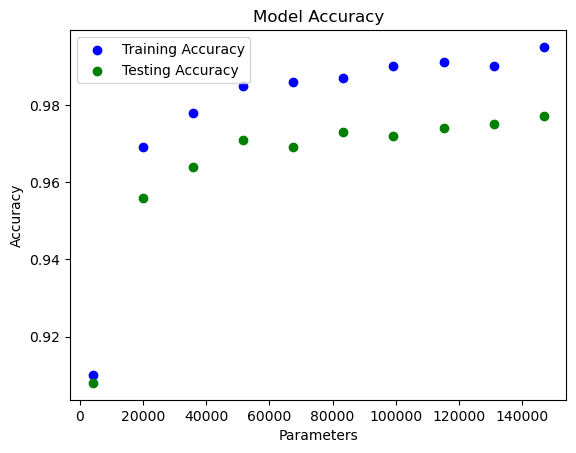

In [22]:
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.scatter(parameters, train_accuracy_lst,  color = "blue")
plt.scatter(parameters, test_accuracy_lst,  color = "green")
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

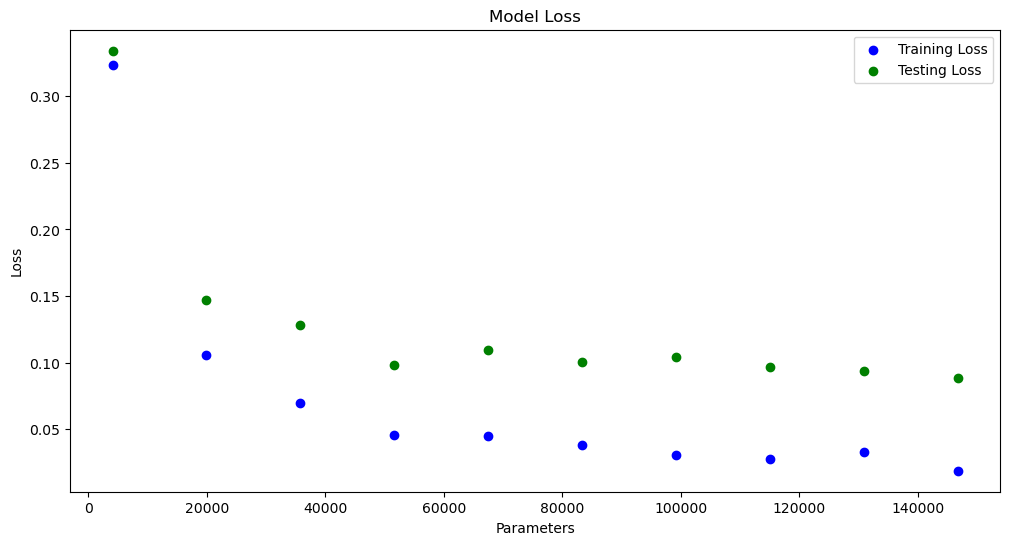

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(parameters, train_loss_lst, color = "blue")
plt.scatter(parameters, test_loss_lst, color = "green")
plt.title('Model Loss')
plt.legend(['Training Loss', 'Testing Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()